### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from scipy.optimize import fsolve
import matplotlib.lines as mlines

Mounted at /content/drive


### State variables vs time

Text(0.5, 1.0, 'Time Evolution of x and y')

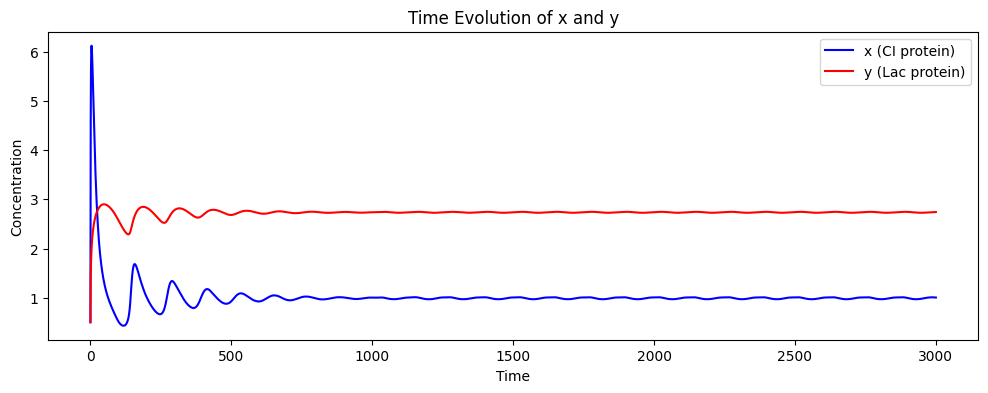

In [2]:
a = 11 # Define parameters
s = 2
ty = 5
gx = 0.105
gy = 0.038

def gene_oscillator(t,state): # Define the system of ODEs
    x, y = state
    numerator = (1 + x**2 + a * s * x**4)
    denominator = ((1 + x**2 + s * x**4) * (1 + y**4))
    dxdt = (numerator / denominator) - gx * x
    dydt = ((numerator / denominator) - gy * y) / ty
    return [dxdt, dydt]

t_span = (0, 3000)  # Simulate for 4000 time units
t_eval = np.linspace(*t_span, 3000)  # Time points for evaluation

x0, y0 = 0.5, 0.5 # ICs

solution = solve_ivp(gene_oscillator, t_span, [x0, y0], t_eval=t_eval, method='RK45') # Solve the ODEs

t_vals = solution.t # Extract results
x_vals, y_vals = solution.y

plt.figure(figsize=(12, 4)) # Plot time series
plt.plot(t_vals, x_vals, label='x (CI protein)', color='b')
plt.plot(t_vals, y_vals, label='y (Lac protein)', color='r')
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.title("Time Evolution of x and y")


### Varying Alpha

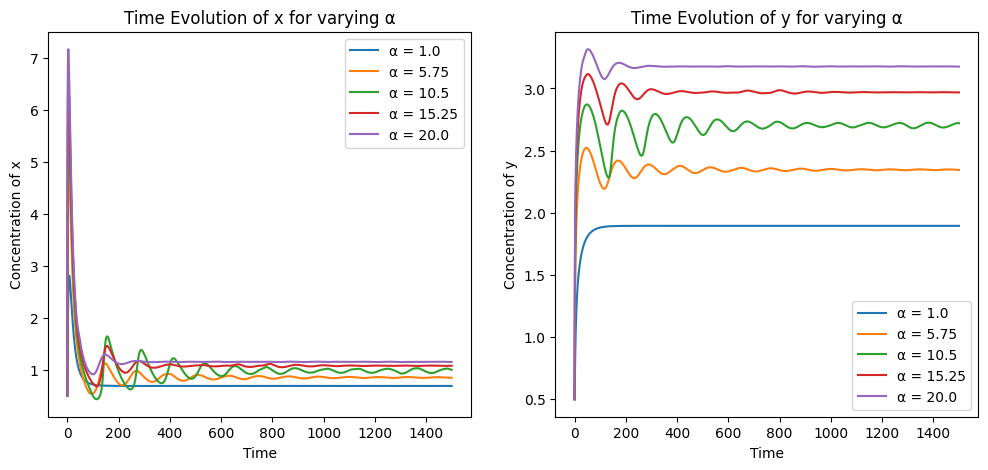

In [4]:

a_vals = np.linspace(1,20,5) # Varied values of alpha
s,ty,gx,gy = 2,5,0.105,0.038 # Fixed parameters
x0, y0 = 0.5, 0.5 # Fixed ICs

t_span = (0, 1500)  # Simulate for 1500 time units
t_eval = np.linspace(*t_span, 1500)  # Time points for evaluation

plt.figure(figsize=(12, 5)) # Plot time series for x
plt.subplot(1,2,1)
for i, a in enumerate(a_vals): # Loop through each alpha value

    def gene_oscillator(t, state): # Define the system of ODEs
        x, y = state
        numerator = (1 + x**2 + a * s * x**4)
        denominator = ((1 + x**2 + s * x**4) * (1 + y**4))
        dxdt = (numerator / denominator) - gx * x
        dydt = ((numerator / denominator) - gy * y) / ty
        return [dxdt, dydt]

    solution = solve_ivp(gene_oscillator, t_span, [x0, y0], t_eval=t_eval, method='RK45') # Solve the ODEs
    t_vals = solution.t # Extract results
    x_vals, y_vals = solution.y

    plt.plot(t_vals, x_vals, label=f'α = {a}')
    plt.xlabel("Time")
    plt.ylabel("Concentration of x")
    plt.legend()
    plt.title("Time Evolution of x for varying α")


plt.subplot(1,2,2)
for i, a in enumerate(a_vals): # Loop through each alpha value

    def gene_oscillator(t, state): # Define the system of ODEs
        x, y = state
        numerator = (1 + x**2 + a * s * x**4)
        denominator = ((1 + x**2 + s * x**4) * (1 + y**4))
        dxdt = (numerator / denominator) - gx * x
        dydt = ((numerator / denominator) - gy * y) / ty
        return [dxdt, dydt]

    solution = solve_ivp(gene_oscillator, t_span, [x0, y0], t_eval=t_eval, method='RK45') # Solve the ODEs
    t_vals = solution.t # Extract results
    x_vals, y_vals = solution.y

    plt.plot(t_vals, y_vals, label=f'α = {a}')
    plt.xlabel("Time")
    plt.ylabel("Concentration of y")
    plt.legend()
    plt.title("Time Evolution of y for varying α")


### Varying sigma

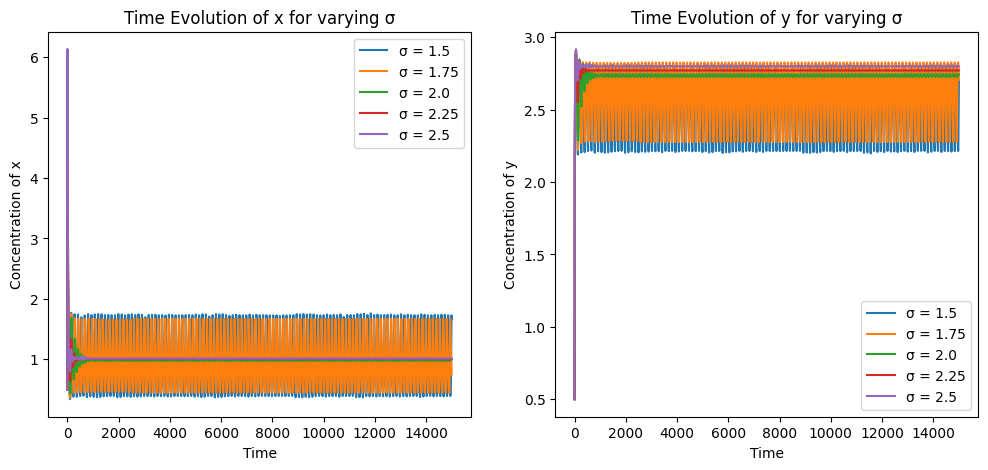

In [30]:

s_vals = np.linspace(1.5,2.5,5) # Varied values of sigma
a,ty,gx,gy = 11,5,0.105,0.038 # Fixed parameters
x0, y0 = 0.5, 0.5 # Fixed ICs

t_span = (0, 15000)  # Simulate for 1500 time units
t_eval = np.linspace(*t_span, 15000)  # Time points for evaluation

plt.figure(figsize=(12, 5)) # Plot time series for x
plt.subplot(1,2,1)
for i, s in enumerate(s_vals): # Loop through each  value

    def gene_oscillator(t, state): # Define the system of ODEs
        x, y = state
        numerator = (1 + x**2 + a * s * x**4)
        denominator = ((1 + x**2 + s * x**4) * (1 + y**4))
        dxdt = (numerator / denominator) - gx * x
        dydt = ((numerator / denominator) - gy * y) / ty
        return [dxdt, dydt]

    solution = solve_ivp(gene_oscillator, t_span, [x0, y0], t_eval=t_eval, method='RK45') # Solve the ODEs
    t_vals = solution.t # Extract results
    x_vals, y_vals = solution.y

    plt.plot(t_vals, x_vals, label=f'σ = {s}')
    plt.xlabel("Time")
    plt.ylabel("Concentration of x")
    plt.legend()
    plt.title("Time Evolution of x for varying σ")


plt.subplot(1,2,2)
for i, s in enumerate(s_vals): # Loop through each  value

    def gene_oscillator(t, state): # Define the system of ODEs
        x, y = state
        numerator = (1 + x**2 + a * s * x**4)
        denominator = ((1 + x**2 + s * x**4) * (1 + y**4))
        dxdt = (numerator / denominator) - gx * x
        dydt = ((numerator / denominator) - gy * y) / ty
        return [dxdt, dydt]

    solution = solve_ivp(gene_oscillator, t_span, [x0, y0], t_eval=t_eval, method='RK45') # Solve the ODEs
    t_vals = solution.t # Extract results
    x_vals, y_vals = solution.y

    plt.plot(t_vals, y_vals, label=f'σ = {s}')
    plt.xlabel("Time")
    plt.ylabel("Concentration of y")
    plt.legend()
    plt.title("Time Evolution of y for varying σ")


### Varying Tau

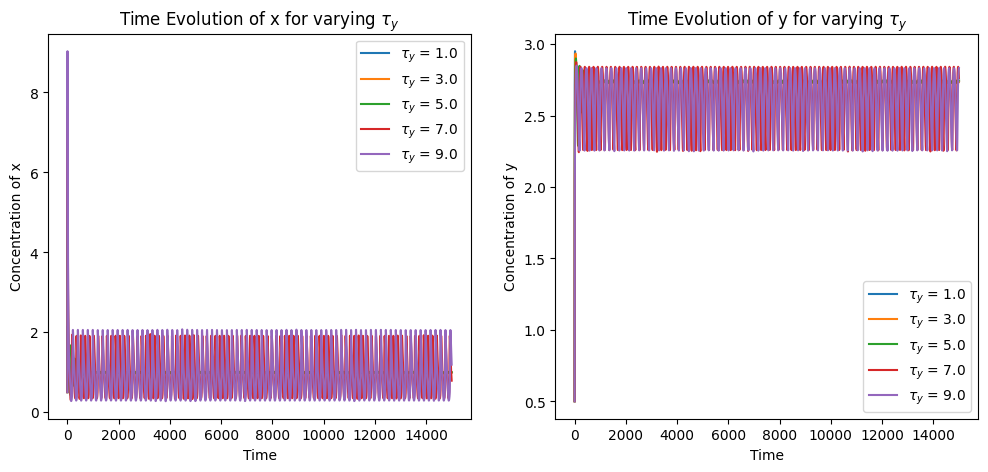

In [29]:

ty_vals = np.linspace(1,9,5) # Varied values of tau
a,s,gx,gy = 11,2,0.105,0.038 # Fixed parameters
x0, y0 = 0.5, 0.5 # Fixed ICs

t_span = (0, 15000)  # Simulate for 1500 time units
t_eval = np.linspace(*t_span, 15000)  # Time points for evaluation

plt.figure(figsize=(12, 5)) # Plot time series for x
plt.subplot(1,2,1)
for i, ty in enumerate(ty_vals): # Loop through each  value

    def gene_oscillator(t, state): # Define the system of ODEs
        x, y = state
        numerator = (1 + x**2 + a * s * x**4)
        denominator = ((1 + x**2 + s * x**4) * (1 + y**4))
        dxdt = (numerator / denominator) - gx * x
        dydt = ((numerator / denominator) - gy * y) / ty
        return [dxdt, dydt]

    solution = solve_ivp(gene_oscillator, t_span, [x0, y0], t_eval=t_eval, method='RK45') # Solve the ODEs
    t_vals = solution.t # Extract results
    x_vals, y_vals = solution.y

    plt.plot(t_vals, x_vals, label=f'$\\tau_y$ = {ty}')
    plt.xlabel("Time")
    plt.ylabel("Concentration of x")
    plt.legend()
    plt.title("Time Evolution of x for varying $\\tau_y$")


plt.subplot(1,2,2)
for i, ty in enumerate(ty_vals): # Loop through each value

    def gene_oscillator(t, state): # Define the system of ODEs
        x, y = state
        numerator = (1 + x**2 + a * s * x**4)
        denominator = ((1 + x**2 + s * x**4) * (1 + y**4))
        dxdt = (numerator / denominator) - gx * x
        dydt = ((numerator / denominator) - gy * y) / ty
        return [dxdt, dydt]

    solution = solve_ivp(gene_oscillator, t_span, [x0, y0], t_eval=t_eval, method='RK45') # Solve the ODEs
    t_vals = solution.t # Extract results
    x_vals, y_vals = solution.y

    plt.plot(t_vals, y_vals, label=f'$\\tau_y$ = {ty}')
    plt.xlabel("Time")
    plt.ylabel("Concentration of y")
    plt.legend()
    plt.title("Time Evolution of y for varying $\\tau_y$")


### Varying gamma y

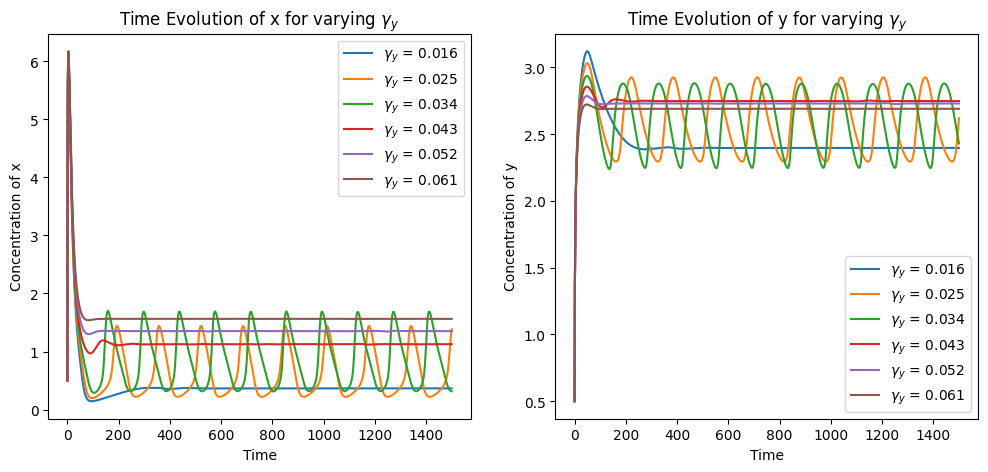

In [ ]:

gy_vals = np.linspace(0.016,0.061,6) # Varied values of gamma y
a,s,gx,ty = 11,2,0.105,5 # Fixed parameters
x0, y0 = 0.5, 0.5 # Fixed ICs

t_span = (0, 1500)  # Simulate for 1500 time units
t_eval = np.linspace(*t_span, 1500)  # Time points for evaluation

plt.figure(figsize=(12, 5)) # Plot time series for x
plt.subplot(1,2,1)
for i, gy in enumerate(gy_vals): # Loop through each alpha value

    def gene_oscillator(t, state): # Define the system of ODEs
        x, y = state
        numerator = (1 + x**2 + a * s * x**4)
        denominator = ((1 + x**2 + s * x**4) * (1 + y**4))
        dxdt = (numerator / denominator) - gx * x
        dydt = ((numerator / denominator) - gy * y) / ty
        return [dxdt, dydt]

    solution = solve_ivp(gene_oscillator, t_span, [x0, y0], t_eval=t_eval, method='RK45') # Solve the ODEs
    t_vals = solution.t # Extract results
    x_vals, y_vals = solution.y

    plt.plot(t_vals, x_vals, label=f'$\\gamma_y$ = {gy}')
    plt.xlabel("Time")
    plt.ylabel("Concentration of x")
    plt.legend()
    plt.title("Time Evolution of x for varying $\\gamma_y$")


plt.subplot(1,2,2)
for i, gy in enumerate(gy_vals): # Loop through each alpha value

    def gene_oscillator(t, state): # Define the system of ODEs
        x, y = state
        numerator = (1 + x**2 + a * s * x**4)
        denominator = ((1 + x**2 + s * x**4) * (1 + y**4))
        dxdt = (numerator / denominator) - gx * x
        dydt = ((numerator / denominator) - gy * y) / ty
        return [dxdt, dydt]

    solution = solve_ivp(gene_oscillator, t_span, [x0, y0], t_eval=t_eval, method='RK45') # Solve the ODEs
    t_vals = solution.t # Extract results
    x_vals, y_vals = solution.y

    plt.plot(t_vals, y_vals, label=f'$\\gamma_y$ = {gy}')
    plt.xlabel("Time")
    plt.ylabel("Concentration of y")
    plt.legend()
    plt.title("Time Evolution of y for varying $\\gamma_y$")


### Varying gamma x

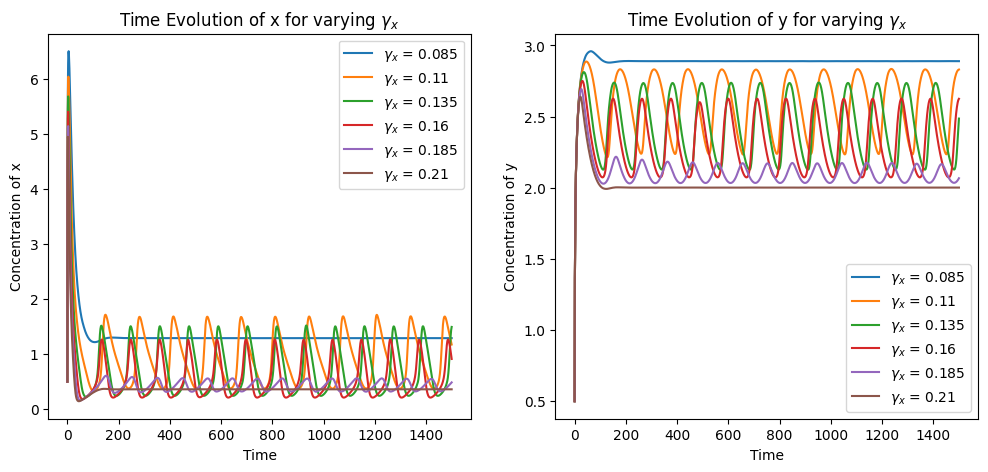

In [ ]:
gx_vals = np.linspace(0.085,0.21,6) # Varied values of gamma y
a,s,gy,ty = 11,2,0.038,5 # Fixed parameters
x0, y0 = 0.5, 0.5 # Fixed ICs

t_span = (0, 1500)  # Simulate for 1500 time units
t_eval = np.linspace(*t_span, 1500)  # Time points for evaluation

plt.figure(figsize=(12, 5)) # Plot time series for x
plt.subplot(1,2,1)
for i, gx in enumerate(gx_vals): # Loop through each alpha value

    def gene_oscillator(t, state): # Define the system of ODEs
        x, y = state
        numerator = (1 + x**2 + a * s * x**4)
        denominator = ((1 + x**2 + s * x**4) * (1 + y**4))
        dxdt = (numerator / denominator) - gx * x
        dydt = ((numerator / denominator) - gy * y) / ty
        return [dxdt, dydt]

    solution = solve_ivp(gene_oscillator, t_span, [x0, y0], t_eval=t_eval, method='RK45') # Solve the ODEs
    t_vals = solution.t # Extract results
    x_vals, y_vals = solution.y

    plt.plot(t_vals, x_vals, label=f'$\\gamma_x$ = {gx}')
    plt.xlabel("Time")
    plt.ylabel("Concentration of x")
    plt.legend()
    plt.title("Time Evolution of x for varying $\\gamma_x$")


plt.subplot(1,2,2)
for i, gx in enumerate(gx_vals): # Loop through each value

    def gene_oscillator(t, state): # Define the system of ODEs
        x, y = state
        numerator = (1 + x**2 + a * s * x**4)
        denominator = ((1 + x**2 + s * x**4) * (1 + y**4))
        dxdt = (numerator / denominator) - gx * x
        dydt = ((numerator / denominator) - gy * y) / ty
        return [dxdt, dydt]

    solution = solve_ivp(gene_oscillator, t_span, [x0, y0], t_eval=t_eval, method='RK45') # Solve the ODEs
    t_vals = solution.t # Extract results
    x_vals, y_vals = solution.y

    plt.plot(t_vals, y_vals, label=f'$\\gamma_x$ = {gx}')
    plt.xlabel("Time")
    plt.ylabel("Concentration of y")
    plt.legend()
    plt.title("Time Evolution of y for varying $\\gamma_x$")


### Phase Portrait with Nulclines

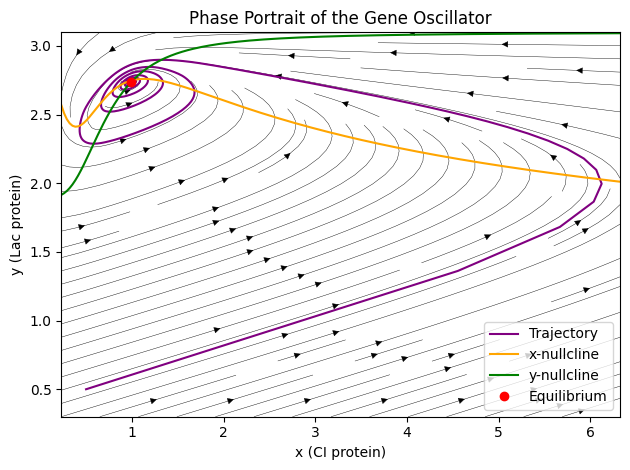

In [ ]:
a = 11
s = 2
ty = 5
gx = 0.105
gy = 0.038

def gene_oscillator(state): # Define the system of ODEs
    x, y = state
    numerator = (1 + x**2 + a * s * x**4)
    denominator = ((1 + x**2 + s * x**4) * (1 + y**4))
    dxdt = (numerator / denominator) - gx * x
    dydt = ((numerator / denominator) - gy * y) / ty
    return [dxdt, dydt]

delta = 0.2 # View on area bigger than system evaluated on
xmin, xmax, ymin, ymax = min(x_vals) - delta, max(x_vals) + delta, min(y_vals) - delta, max(y_vals) + delta
x_grid, y_grid = np.meshgrid(np.linspace(xmin, xmax, 20),  # Grid of points for phase portrait
                             np.linspace(ymin, ymax, 20))

dx_grid, dy_grid = np.zeros_like(x_grid), np.zeros_like(y_grid) # Eval the system at each grid point

for i in range(len(x_grid)): # Vector for every point in grid
    for j in range(len(y_grid)):
        dxdt, dydt = gene_oscillator([x_grid[i, j], y_grid[i, j]])
        dx_grid[i, j] = dxdt
        dy_grid[i, j] = dydt

plt.streamplot(x_grid, y_grid, dx_grid, dy_grid, color='black', linewidth=0.3) # Plot the phase portrait with flow arrows
plt.plot(x_vals, y_vals, color='purple', label="Trajectory")
plt.xlabel("x (CI protein)")
plt.ylabel("y (Lac protein)")
plt.title("Phase Portrait of the Gene Oscillator")

# Nullclines
def x_nullcline(x): # Where dx/dt = 0
    return np.sqrt(np.sqrt((1 + x**2 + a * s * x**4) / (gx * x * (1 + x**2 + s * x**4))))
x_vals_nullcline = np.linspace(xmin, xmax, 200) # X for the nullcline
y_vals_nullcline_x = x_nullcline(x_vals_nullcline) # y for the nullcline

def y_nullcline(x): # Where dy/dt = 0
    def eqn(y):
        return (1 + x**2 + a * s * x**4) / ((1 + x**2 + s * x**4) * (1 + y**4)) - gy * y
    y_sol = fsolve(eqn, 0.5)
    return y_sol[0]
y_vals_nullcline_y = [y_nullcline(x) for x in x_vals_nullcline] # y for the nullcline

# Equilibrium
equilibrium = fsolve(gene_oscillator, [0.5, 0.5], args=()) # Find the equilibrium point

plt.plot(x_vals_nullcline, y_vals_nullcline_x, label="x-nullcline", color='orange') # Plot the nullclines
plt.plot(x_vals_nullcline, y_vals_nullcline_y, label="y-nullcline", color='green')
plt.plot(equilibrium[0], equilibrium[1], 'ro', label="Equilibrium") # Plot the equilibrium point
plt.legend(loc='lower right')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.tight_layout()

### Effect of different ICs

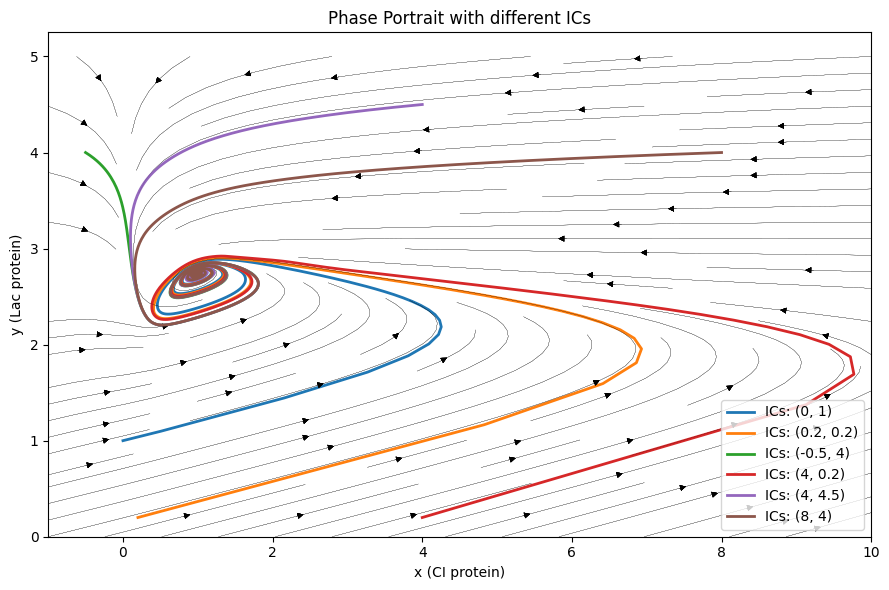

In [28]:

# Effect of different ICs
a = 11
s = 2
ty = 5
gx = 0.105
gy = 0.038

def gene_oscillator(t, state):  # Define the system of ODEs
    x, y = state
    numerator = (1 + x**2 + a * s * x**4)
    denominator = ((1 + x**2 + s * x**4) * (1 + y**4))
    dxdt = (numerator / denominator) - gx * x
    dydt = ((numerator / denominator) - gy * y) / ty
    return [dxdt, dydt]


x_grid, y_grid = np.meshgrid(np.linspace(-1,10, 20),  # Grid of points for phase portrait
                             np.linspace(0, 5, 20))

dx_grid, dy_grid = np.zeros_like(x_grid), np.zeros_like(y_grid)  # Eval the system at each grid point

for i in range(len(x_grid)):  # Vector for every point in grid
    for j in range(len(y_grid)):
        dxdt, dydt = gene_oscillator(0,[x_grid[i, j], y_grid[i, j]])
        dx_grid[i, j] = dxdt
        dy_grid[i, j] = dydt

# Define different initial conditions
ICs = [(0,1), (0.2,0.2), (-0.5,4), (4,0.2), (4,4.5), (8,4)]

plt.figure(figsize=(9, 6))
for i, (x0, y0) in enumerate(ICs):
    t_span = (0, 3000)  # Simulate for 1500 time units
    t_eval = np.linspace(*t_span, 3000)  # Time points for evaluation
    solution = solve_ivp(gene_oscillator, t_span, [x0, y0], t_eval=t_eval, method='RK45')  # Solve the ODEs
    t_vals = solution.t  # Extract results
    x_vals, y_vals = solution.y
    plt.streamplot(x_grid, y_grid, dx_grid, dy_grid, color='black', linewidth=0.05)  # Plot the phase portrait with flow arrows
    plt.plot(x_vals, y_vals, label=f"ICs: {ICs[i]}", linewidth=2)
    plt.xlabel("x (CI protein)")
    plt.ylabel("y (Lac protein)")
    plt.title("Phase Portrait with different ICs")
plt.legend(loc='lower right')
plt.tight_layout()


### Varying gamma_x phase portraits

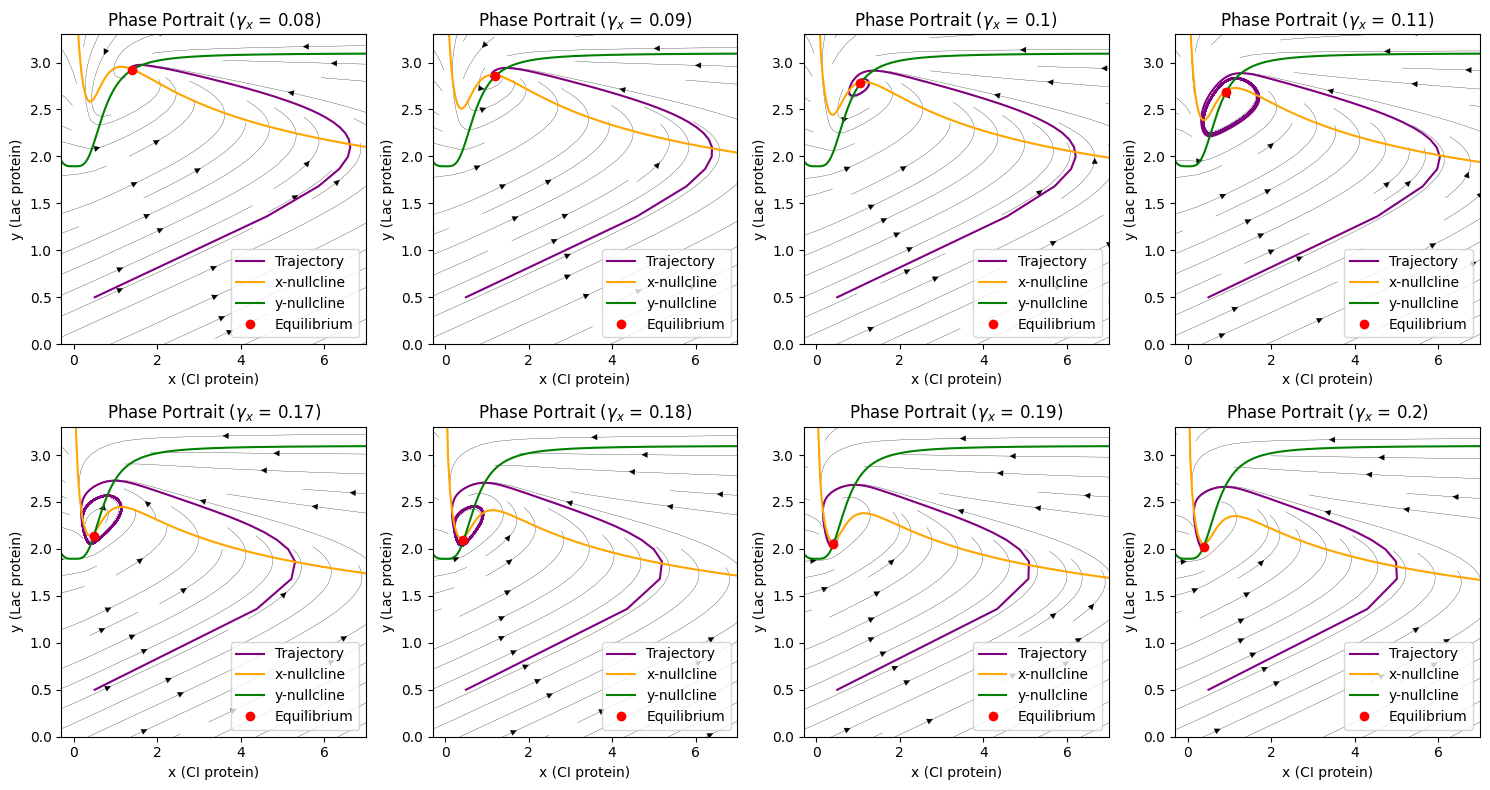

In [ ]:


gx_values = [0.08, 0.09, 0.1, 0.11,   0.17, 0.18, 0.19, 0.2] # Different values for gamma_x

plt.figure(figsize=(15, 8))
for i, gx in enumerate(gx_values): # Loop through each gamma value

    def gene_oscillator_gx(t, state): # Define and solves ODEs for each gamma
        x, y = state
        numerator = (1 + x**2 + a * s * x**4)
        denominator = ((1 + x**2 + s * x**4) * (1 + y**4))
        dxdt = (numerator / denominator) - gx * x
        dydt = ((numerator / denominator) - gy * y) / ty
        return [dxdt, dydt]
    solution = solve_ivp(gene_oscillator_gx, t_span, [x0, y0], t_eval=t_eval, method='RK45')
    t_vals = solution.t
    x_vals, y_vals = solution.y
    delta = 2 # View on area bigger than system evaluated on
    xmin, xmax, ymin, ymax = min(x_vals) - delta, max(x_vals) + delta, min(y_vals) - delta, max(y_vals) + delta
    x_grid, y_grid = np.meshgrid(np.linspace(xmin, xmax, 50),  # Grid of points for phase portrait
                                np.linspace(ymin, ymax, 50))
    dx_grid, dy_grid = np.zeros_like(x_grid), np.zeros_like(y_grid)

    # Nullclines
    def x_nullcline(x): # Where dx/dt = 0
        return np.sqrt(np.sqrt((1 + x**2 + a * s * x**4) / (gx * x * (1 + x**2 + s * x**4))))
    x_vals_nullcline = np.linspace(xmin, xmax, 200) # X for the nullcline
    y_vals_nullcline_x = x_nullcline(x_vals_nullcline) # y for the nullcline

    def y_nullcline(x): # Where dy/dt = 0
        def eqn(y):
            return (1 + x**2 + a * s * x**4) / ((1 + x**2 + s * x**4) * (1 + y**4)) - gy * y
        y_sol = fsolve(eqn, 0.5)
        return y_sol[0]
    y_vals_nullcline_y = [y_nullcline(x) for x in x_vals_nullcline] # y for the nullcline

    plt.subplot(2, 4, i + 1)
    for j in range(len(x_grid)):
        for k in range(len(y_grid)):
            dxdt, dydt = gene_oscillator_gx(0, [x_grid[j, k], y_grid[j, k]])
            dx_grid[j, k] = dxdt
            dy_grid[j, k] = dydt

    def gene_oscillator_gx_eqm(state):
        return gene_oscillator_gx(0, state)
    equilibrium = fsolve(gene_oscillator_gx_eqm, [0.5, 0.5], args=())

    plt.streamplot(x_grid, y_grid, dx_grid, dy_grid, color='k', linewidth=0.2)
    plt.plot(x_vals, y_vals, color='purple', label="Trajectory")
    plt.plot(x_vals_nullcline, y_vals_nullcline_x, label="x-nullcline", color='orange') # Plot the nullclines
    plt.plot(x_vals_nullcline, y_vals_nullcline_y, label="y-nullcline", color='green')
    plt.plot(equilibrium[0], equilibrium[1], 'ro', label="Equilibrium") # Plot the equilibrium point
    plt.xlabel("x (CI protein)")
    plt.ylabel("y (Lac protein)")
    plt.legend(loc='lower right')
    plt.xlim(-0.3,7)
    plt.ylim(0,3.3)
    plt.title(f"Phase Portrait ($\\gamma_x$ = {gx})")
plt.tight_layout()


### Bifurcation analysis

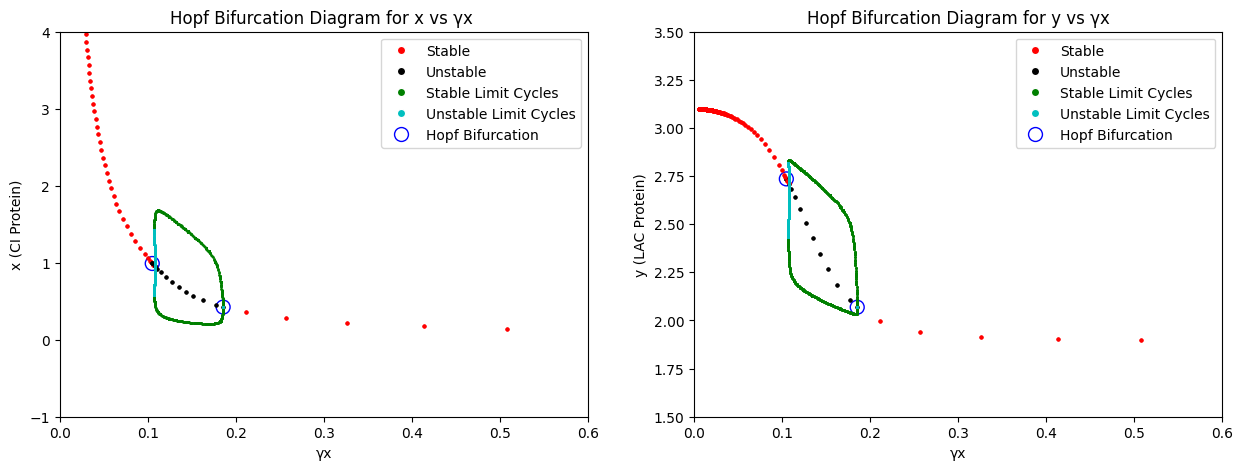

In [6]:
stable_leg = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='r', markersize=6, label="Stable")
unstable_leg = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='k', markersize=6, label="Unstable")
stable_limit_leg = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='g', markersize=6, label="Stable Limit Cycles")
unstable_limit_leg = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='c', markersize=6, label="Unstable Limit Cycles")
hopf_leg = mlines.Line2D([], [], marker='o', color='w', markeredgecolor='b', markerfacecolor='none', markersize=10, label="Hopf Bifurcation")

bif_data_X = np.loadtxt('/content/drive/My Drive/MM in Biology/CWX.dat') # BIF X
X_gx = bif_data_X[:, 0]
X_X1 = bif_data_X[:, 1]
X_X2 = bif_data_X[:, 2]
X_stab = bif_data_X[:, 3]
stable_X = X_stab == 1
unstable_X = X_stab == 2
S_limitcycles_X = X_stab == 3
U_limitcycles_X = X_stab == 4

bif_data_Y = np.loadtxt('/content/drive/My Drive/MM in Biology/CWY.dat') # BIF Y
Y_gx = bif_data_Y[:, 0]
Y_Y1 = bif_data_Y[:, 1]
Y_Y2 = bif_data_Y[:, 2]
Y_stab = bif_data_Y[:, 3]
stable_Y = Y_stab == 1
unstable_Y = Y_stab == 2
S_limitcycles_Y = Y_stab == 3
U_limitcycles_Y = Y_stab == 4

hopf_X = np.where((stable_X[:-1] != stable_X[1:]))[0] # Locations of Hopf Bifurcations
hopf_X = [hopf_X[0], hopf_X[2]]
hopf_Y = np.where((stable_Y[:-1] != stable_Y[1:]))[0]
hopf_Y = [hopf_Y[0], hopf_Y[2]]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1) # BIFURCATION DIAGRAM FOR X
plt.plot(X_gx[stable_X],X_X1[stable_X], 'ro', markersize=2, label = 'Stable')
plt.plot(X_gx[stable_X],X_X2[stable_X], 'ro', markersize=2)
plt.plot(X_gx[unstable_X],X_X1[unstable_X], 'ko', markersize=2,label = 'Unstable')
plt.plot(X_gx[unstable_X],X_X2[unstable_X], 'ko', markersize=2)
plt.plot(X_gx[S_limitcycles_X],X_X1[S_limitcycles_X], 'go', markersize=1,label = 'Stable Limit Cycles')
plt.plot(X_gx[S_limitcycles_X],X_X2[S_limitcycles_X], 'go', markersize=1)
plt.plot(X_gx[U_limitcycles_X],X_X1[U_limitcycles_X], 'co', markersize=1,label = 'Unstable Limit Cycles')
plt.plot(X_gx[U_limitcycles_X],X_X2[U_limitcycles_X], 'co', markersize=1)
plt.scatter(X_gx[hopf_X], X_X1[hopf_X], s=100, facecolors='none', edgecolors='b', label="Hopf Bifurcation")
plt.xlim(0,0.6)
plt.ylim(-1,4)
plt.title("Hopf Bifurcation Diagram for x vs γx ")
plt.legend(handles=[stable_leg, unstable_leg, stable_limit_leg, unstable_limit_leg, hopf_leg], loc="best")
plt.xlabel("γx")
plt.ylabel("x (CI Protein)")

plt.subplot(1, 2, 2) # BIFURCATION DIAGRAM FOR Y
plt.plot(Y_gx[unstable_Y],Y_Y1[unstable_Y], 'ko', markersize=2,label = 'Unstable')
plt.plot(Y_gx[unstable_Y],Y_Y2[unstable_Y], 'ko', markersize=2)
plt.plot(Y_gx[stable_Y],Y_Y1[stable_Y], 'ro', markersize=2, label = 'Stable')
plt.plot(Y_gx[stable_Y],Y_Y2[stable_Y], 'ro', markersize=2)
plt.plot(Y_gx[S_limitcycles_Y],Y_Y1[S_limitcycles_Y], 'go', markersize=1,label = 'Stable Limit Cycles')
plt.plot(Y_gx[S_limitcycles_Y],Y_Y2[S_limitcycles_Y], 'go', markersize=1)
plt.plot(Y_gx[U_limitcycles_Y],Y_Y1[U_limitcycles_Y], 'co', markersize=1,label = 'Unstable Limit Cycles')
plt.plot(Y_gx[U_limitcycles_Y],Y_Y2[U_limitcycles_Y], 'co', markersize=1)
plt.scatter(Y_gx[hopf_Y], Y_Y1[hopf_Y], s=100, facecolors='none', edgecolors='b', label="Hopf Bifurcation")
plt.xlim(0,0.6)
plt.ylim(1.5,3.5)
plt.title("Hopf Bifurcation Diagram for y vs γx")
plt.legend(handles=[stable_leg, unstable_leg, stable_limit_leg, unstable_limit_leg, hopf_leg], loc="best")
plt.xlabel("γx")
plt.ylabel("y (LAC Protein)")


### Viewing the unstable limit cycle

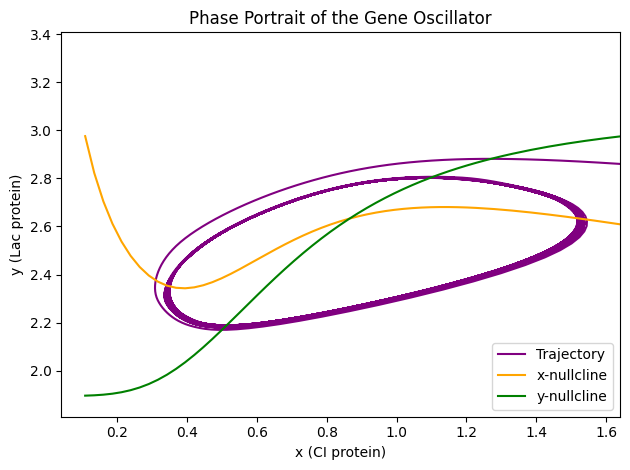

In [169]:
a = 11
s = 2
ty = 4
gx = 0.118
gy = 0.038

def gene_oscillator_eqm(state): # Define the system of ODEs
    x, y = state
    numerator = (1 + x**2 + a * s * x**4)
    denominator = ((1 + x**2 + s * x**4) * (1 + y**4))
    dxdt = (numerator / denominator) - gx * x
    dydt = ((numerator / denominator) - gy * y) / ty
    return [dxdt, dydt]

def gene_oscillator(t, state): # Define the system of ODEs
    x, y = state
    numerator = (1 + x**2 + a * s * x**4)
    denominator = ((1 + x**2 + s * x**4) * (1 + y**4))
    dxdt = (numerator / denominator) - gx * x
    dydt = ((numerator / denominator) - gy * y) / ty
    return [dxdt, dydt]


t_span = (0, 10000)  # Simulate for 4000 time units
t_eval = np.linspace(*t_span, 10000)  # Time points for evaluation

x0, y0 = 0.5, 0.5 # ICs

solution = solve_ivp(gene_oscillator, t_span, [x0, y0], t_eval=t_eval, method='RK45') # Solve the ODEs

t_vals = solution.t # Extract results
x_vals, y_vals = solution.y

delta = 0.2 # View on area bigger than system evaluated on
xmin, xmax, ymin, ymax = min(x_vals) - delta, max(x_vals) + delta, min(y_vals) - delta, max(y_vals) + delta
x_grid, y_grid = np.meshgrid(np.linspace(xmin, xmax, 20),  # Grid of points for phase portrait
                             np.linspace(ymin, ymax, 20))

dx_grid, dy_grid = np.zeros_like(x_grid), np.zeros_like(y_grid) # Eval the system at each grid point

plt.plot(x_vals, y_vals, color='purple', label="Trajectory")
plt.xlabel("x (CI protein)")
plt.ylabel("y (Lac protein)")
plt.title("Phase Portrait of the Gene Oscillator")

# Nullclines
def x_nullcline(x): # Where dx/dt = 0
    return np.sqrt(np.sqrt((1 + x**2 + a * s * x**4) / (gx * x * (1 + x**2 + s * x**4))))
x_vals_nullcline = np.linspace(xmin, xmax, 200) # X for the nullcline
y_vals_nullcline_x = x_nullcline(x_vals_nullcline) # y for the nullcline

def y_nullcline(x): # Where dy/dt = 0
    def eqn(y):
        return (1 + x**2 + a * s * x**4) / ((1 + x**2 + s * x**4) * (1 + y**4)) - gy * y
    y_sol = fsolve(eqn, 0.5)
    return y_sol[0]
y_vals_nullcline_y = [y_nullcline(x) for x in x_vals_nullcline] # y for the nullcline

# Equilibrium
equilibrium = fsolve(gene_oscillator_eqm, [0.5, 0.5], args=()) # Find the equilibrium point

plt.plot(x_vals_nullcline, y_vals_nullcline_x, label="x-nullcline", color='orange') # Plot the nullclines
plt.plot(x_vals_nullcline, y_vals_nullcline_y, label="y-nullcline", color='green')
plt.legend(loc='lower right')
zoom_mar = [0.8,0.8]
plt.xlim(equilibrium[0] - zoom_mar[0], equilibrium[0] + zoom_mar[0])
plt.ylim(equilibrium[1] - zoom_mar[1], equilibrium[1] + zoom_mar[1])
plt.tight_layout()